In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


#### 1. 연습1

In [2]:
mnist = input_data.read_data_sets('./mnist/data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data\t10k-images-idx3-ubyte.gz
Extracting ./mnist/data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [39]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

keep_prob = tf.placeholder(tf.float32)
n1 = 256
n2 = 256

W1 = tf.Variable(tf.random_normal([784,n1], stddev=0.01))
b1 = tf.Variable(tf.random_normal([n1], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X,W1)+b1)
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([n1,n2], stddev=0.01))
b2 = tf.Variable(tf.random_normal([n2], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1,W2)+b2)
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([n2,10], stddev=0.01))
b3 = tf.Variable(tf.random_normal([10], stddev=0.01))
model = tf.nn.softmax(tf.matmul(L2,W3)+b3, axis=1)

cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(model), axis=1))
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)
train_op = optimizer.minimize(cost)

init = tf.global_variables_initializer()

Epoch: 1 Avg. cost = 1.026
Epoch: 2 Avg. cost = 0.442
Epoch: 3 Avg. cost = 0.362
Epoch: 4 Avg. cost = 0.315
Epoch: 5 Avg. cost = 0.285
Epoch: 6 Avg. cost = 0.256
Epoch: 7 Avg. cost = 0.228
Epoch: 8 Avg. cost = 0.206
Epoch: 9 Avg. cost = 0.190
Epoch: 10 Avg. cost = 0.172
Epoch: 11 Avg. cost = 0.158
Epoch: 12 Avg. cost = 0.148
Epoch: 13 Avg. cost = 0.136
Epoch: 14 Avg. cost = 0.126
Epoch: 15 Avg. cost = 0.116
0.9676


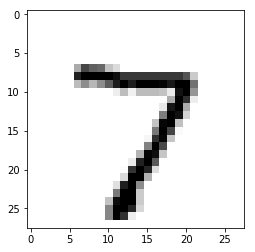

[7]


In [44]:
with tf.Session() as sess:
    sess.run(init)
    batch_size = 100
    total_batch = int(mnist.train.num_examples/100)
    
    for epoch in range(15):
        total_cost = 0
        
        for _ in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_op, feed_dict={X: batch_xs, Y: batch_ys, keep_prob: 0.8})
            cost_val = sess.run(cost, feed_dict={X: batch_xs, Y: batch_ys, keep_prob: 0.8})
            total_cost += cost_val
            
        print('Epoch:', (epoch+1), 'Avg. cost = {:.3f}'.format(total_cost/total_batch))
        
    is_correct = tf.equal(tf.argmax(model, axis=1), tf.argmax(Y, axis=1))
    accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
    
    print(sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))
    
    img = mnist.test.images[0].reshape(28,28)
    plt.imshow(img, cmap=plt.cm.binary)
    plt.show()
    print(sess.run(tf.argmax(model, axis=1), feed_dict={X: mnist.test.images[:1,:], keep_prob: 1}))

#### 2. 연습2

In [273]:
#x_data = np.array([[0,0],[1,0],[1,1],[0,0],[0,0],[0,1]])
x_data = np.array([[1,1],[1,1],[1,1],[1,1],[1,1],[1,1]])
y_data = np.array([
    [1,0,0],
    [0,1,0],
    [0,0,1],
    [1,0,0],
    [1,0,0],
    [0,0,1]
])

In [349]:
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 3])

W1 = tf.Variable(tf.random_uniform([2, 5], -1, 1))
L1 = tf.matmul(X, W1)
L1_2 = tf.nn.dropout(L1, 0.7)
# L1_2 : L1/0.7을 한 후 30%를 0으로 치환

W2 = tf.Variable(tf.random_uniform([5, 3], -1, 1))
b2 = tf.Variable(tf.random_uniform([3], -1, 1))
model = tf.nn.softmax(tf.matmul(L1_2, W2) + b2)

cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(model), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_op = optimizer.minimize(cost)
init = tf.global_variables_initializer()

In [350]:
with tf.Session() as sess:
    sess.run(init)
    w = sess.run(W1, feed_dict={X: x_data})
    before = sess.run(L1, feed_dict={X: x_data})
    dropout = sess.run(L1_2, feed_dict={X: x_data})

In [352]:
before

array([[ 0.76889706,  0.1344831 , -0.22330785,  0.38124418,  0.35005856],
       [ 0.76889706,  0.1344831 , -0.22330785,  0.38124418,  0.35005856],
       [ 0.76889706,  0.1344831 , -0.22330785,  0.38124418,  0.35005856],
       [ 0.76889706,  0.1344831 , -0.22330785,  0.38124418,  0.35005856],
       [ 0.76889706,  0.1344831 , -0.22330785,  0.38124418,  0.35005856],
       [ 0.76889706,  0.1344831 , -0.22330785,  0.38124418,  0.35005856]],
      dtype=float32)

In [351]:
dropout

array([[ 0.        ,  0.19211872, -0.3190112 ,  0.5446346 ,  0.5000837 ],
       [ 0.        ,  0.19211872, -0.3190112 ,  0.        ,  0.5000837 ],
       [ 0.        ,  0.19211872, -0.        ,  0.5446346 ,  0.5000837 ],
       [ 1.0984244 ,  0.        , -0.3190112 ,  0.        ,  0.5000837 ],
       [ 0.        ,  0.19211872, -0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.19211872, -0.3190112 ,  0.5446346 ,  0.5000837 ]],
      dtype=float32)

In [353]:
before/0.7

array([[ 1.0984244 ,  0.19211872, -0.3190112 ,  0.5446346 ,  0.5000837 ],
       [ 1.0984244 ,  0.19211872, -0.3190112 ,  0.5446346 ,  0.5000837 ],
       [ 1.0984244 ,  0.19211872, -0.3190112 ,  0.5446346 ,  0.5000837 ],
       [ 1.0984244 ,  0.19211872, -0.3190112 ,  0.5446346 ,  0.5000837 ],
       [ 1.0984244 ,  0.19211872, -0.3190112 ,  0.5446346 ,  0.5000837 ],
       [ 1.0984244 ,  0.19211872, -0.3190112 ,  0.5446346 ,  0.5000837 ]],
      dtype=float32)

In [ ]:
before/(1-k) = dropout

In [ ]:
dropout*k = dropout - before

In [345]:
k = (dropout - before)/dropout
k[0][1] = 0
k

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


array([[0.00999994, 0.        , 0.00999997, 0.00999997, 0.00999993],
       [0.00999994, 0.00999999, 0.00999997, 0.00999997, 0.00999993],
       [0.00999994, 0.00999999, 0.00999997, 0.00999997, 0.00999993],
       [0.00999994, 0.00999999, 0.00999997, 0.00999997, 0.00999993],
       [0.00999994, 0.00999999, 0.00999997, 0.00999997, 0.00999993],
       [0.00999994, 0.00999999, 0.00999997, 0.00999997, 0.00999993]],
      dtype=float32)